# Bipartite two level systems: eigenvalues

The *Permutational Invariant Quantum Solver (PIQS)* is an open-source Python solver to study the exact Lindbladian dynamics of open quantum systems consisting of identical qubits. It is integrated in QuTiP and can be imported as a model.

This tutorial is meant to check whether the eigenvalues of the final density matrices obtained with QuTiP and PIQS are equivalent. The density matrices obtained with PIQS live in a lower dimensional space compared to QuTiP so the straightforward comparison between the two sets of eigenvales is not sufficient. However, one can multiply the eigenvalues obtained with QuTiP by their multiplicity. This way the same number of eigenvalues is obtained with both QuTiP and PIQS hence the values can be compared.

In [1]:
%load_ext autotime
%load_ext autoreload
%autoreload 2

time: 34 ms


In [2]:
import library

import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.linalg as la
import numpy as np
import pandas as pd
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from scipy import linalg
from collections import Counter
from mpmath import mp

from qutip import *
from qutip import piqs

time: 1.9 s


In [3]:
plt.rcParams["figure.figsize"] = (12,8)

time: 29.4 ms


In [4]:
def plot_state (density):
    density_real = np.absolute(density)
    fig = plt.figure(figsize=(4, 3))
    label_size = 16

    plt.rc('xtick', labelsize=label_size) 
    plt.rc('ytick', labelsize=label_size)

    ax1 = fig.add_subplot(111)
    ax1.set_title('density matrix', fontsize=label_size)
    ax1.set_xticks([])
    ax1.set_yticks([])
    im1 = ax1.imshow(density_real, interpolation='None', cmap='Blues', norm=mpl.colors.LogNorm())
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.10)
    fig.colorbar(im1, cax=cax, orientation='vertical')

    plt.show()
    plt.close()

time: 27.8 ms


In [5]:
def compare_eig(rho_1, rho_2, decimals=6, fast=False, verbose=False):

    if fast: eig_1 = np.real(la.eigvals(rho_1))
    else: eig_1, _ = mp.eighe(mp.matrix(np.array(rho_1)))
        
    print('1st matrix\nSUM = ', np.array(eig_1).sum())
    if verbose: print('eigenvalues\n', eig_1)
    eig_rounded_1 = np.array([rounding(i,decimals) for i in eig_1])
    if verbose: print('rounded eigenvalues\n', eig_rounded_1)
    dict_1 = dict(zip(eig_rounded_1, eig_1))
    if verbose: print('dict_1\n', dict_1)
    eig_dict_1 = Counter(eig_rounded_1)
    if verbose: print(eig_dict_1)
    eig_1 = [eig_dict_1[k]*dict_1[k] for k in eig_dict_1]
    if verbose:
        for i in eig_dict_1: print(i, eig_dict_1[i],'\t\t ==> ', dict_1[i]*eig_dict_1[i])
    eig_1= np.array([rounding(i,decimals) for i in eig_1])
    if verbose: print('merged and rounded\n', eig_1)
    eig_1 = np.sort(eig_1)
    print('eigenvalues_1\n', eig_1)
    print('sum = ', eig_1.sum())

    if fast: eig_2 = np.real(la.eigvals(rho_2))
    else: eig_2, _ = mp.eighe(mp.matrix(np.array(rho_2)))
        
    print('\n2nd matrix\nSUM = ', np.array(eig_2).sum())
        
    if verbose: print('eigenvalues\n', eig_2)
    eig_rounded_2 = np.array([rounding(i,decimals) for i in eig_2])
    if verbose: print('rounded eigenvalues\n', eig_rounded_2)
    dict_2 = dict(zip(eig_rounded_2, eig_2))
    if verbose: print('dict_2\n', dict_2)
    eig_dict_2 = Counter(eig_rounded_2)
    if verbose: print(eig_dict_2)
    eig_2 = [eig_dict_2[k]*dict_2[k] for k in eig_dict_2]
    if verbose:
        for i in eig_dict_2: print(i, eig_dict_2[i],'\t\t ==> ', dict_2[i]*eig_dict_2[i])
    eig_2 = np.array([rounding(i,decimals) for i in eig_2])
    if verbose: print('merged and rounded\n', eig_2)
    eig_2 = np.sort(eig_2)
    print('eigenvalues_2\n', eig_2)
    print('sum = ', eig_2.sum())

    common_eig = [i for i in eig_1 if i in eig_2]
    print('\ncommon eigenvalues\n', common_eig)

    eig1_not_eig2 = [i for i in eig_1 if i not in eig_2]
    print('eigenvalues of rho_1 not found in rho_2\n',eig1_not_eig2)
    eig2_not_eig1 = [i for i in eig_2 if i not in eig_1]
    print('eigenvalues of rho_2 not found in rho_1\n',eig2_not_eig1)

    total_eig = len(eig_2)+len(eig_1)
    not_matched = len(eig1_not_eig2)+len(eig2_not_eig1)

    print('\n\n{0} not matched eigenvalues out of {1} ({2:0.2f}%)\n\n'.format(not_matched, total_eig, 100*not_matched/total_eig))


time: 32.7 ms


In [6]:
def rounding(number:float, decimals:int=2):
    """ Returns a value rounded down to a specific number of decimal places.
    """
    
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.floor(number)

    factor = 10 ** decimals
    return math.floor(number * factor) / factor

time: 37 ms


### Eigenvalues comparison: one species case

In [7]:
N = 6

initial_qutip = piqs.ground(N, 'uncoupled')
final_qutip = np.array(library.one_species_qutip_mesolve(N, initial_qutip)[-1])

initial_piqs = piqs.ground(N,'dicke')
final_piqs = np.array(library.one_species_piqs_mesolve(N, initial_piqs)[-1])

time: 17.9 s


In [8]:
decimal_precision = 7
compare_eig(final_qutip, final_piqs, decimal_precision, fast=True, verbose=False)

1st matrix
SUM =  1.0000000000000002
eigenvalues_1
 [0.0156739 0.0156946 0.0157113 0.0157242 0.0157348 0.0157452 0.0157565
 0.0778402 0.0780769 0.0781623 0.0782305 0.0782874 0.0783417 0.14022
 0.1403465 0.1404533]
sum =  0.9999993

2nd matrix
SUM =  0.9999999999999998
eigenvalues_2
 [0.0156739 0.0156946 0.0157113 0.0157242 0.0157348 0.0157452 0.0157565
 0.0778402 0.0780769 0.0781623 0.0782305 0.0782874 0.0783417 0.14022
 0.1403465 0.1404533]
sum =  0.9999993

common eigenvalues
 [0.0156739, 0.0156946, 0.0157113, 0.0157242, 0.0157348, 0.0157452, 0.0157565, 0.0778402, 0.0780769, 0.0781623, 0.0782305, 0.0782874, 0.0783417, 0.14022, 0.1403465, 0.1404533]
eigenvalues of rho_1 not found in rho_2
 []
eigenvalues of rho_2 not found in rho_1
 []


0 not matched eigenvalues out of 32 (0.00%)


time: 43 ms


In [9]:
eigenstates = [[1,2,2,'1,1',2,'1,1'],
               [2,4,4,'1,1,1,1',4,'1,1,1,1'],
               [3,4,8,'2,2,1,1,1,1',6,'1,1,1,1,1,1'],
               [4,5,16,'3,3,3,2,1,1,1,1,1',9,'1,1,1,1,1,1,1,1,1'],
               [5,6,32,'5,5,4,4,4,4,1,1,1,1,1,1',12,'1,1,1,1,1,1,1,1,1,1,1'],
               [6,7,64,'9,9,9,5,5,5,5,5,5,1,1,1,1,1,1,1',16,'1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1'],
               [7,8,128,'14,14,14,14,14,14,6,6,6,6,6,6,1,1,1,1,1,1,1,1',20,'1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1'],
               [8,9,256,'28,28,28,20,20,20,20,20,14,7,7,7,7,7,1,1,1,1,1,1,1,1,1',25,
                '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1'],
               [9,10,512,'48,48,48,48,42,42,27,27,27,27,27,27,8,8,8,8,8,8,8,8,1,1,1,1,1,1,1,1,1,1',30,
                '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1']]
columns=['N','common unique eigenvales','dim uncoupled space','Counter uncoupled','dim dicke space', 'Counter dicke']
pd.DataFrame(eigenstates, columns=columns)

,N,common unique eigenvales,dim uncoupled space,Counter uncoupled,dim dicke space,Counter dicke
0,1,2,2,"1,1",2,"1,1"
1,2,4,4,"1,1,1,1",4,"1,1,1,1"
2,3,4,8,"2,2,1,1,1,1",6,"1,1,1,1,1,1"
3,4,5,16,"3,3,3,2,1,1,1,1,1",9,"1,1,1,1,1,1,1,1,1"
4,5,6,32,"5,5,4,4,4,4,1,1,1,1,1,1",12,"1,1,1,1,1,1,1,1,1,1,1"
5,6,7,64,"9,9,9,5,5,5,5,5,5,1,1,1,1,1,1,1",16,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
6,7,8,128,"14,14,14,14,14,14,6,6,6,6,6,6,1,1,1,1,1,1,1,1",20,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
7,8,9,256,"28,28,28,20,20,20,20,20,14,7,7,7,7,7,1,1,1,1,1...",25,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
8,9,10,512,"48,48,48,48,42,42,27,27,27,27,27,27,8,8,8,8,8,...",30,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."


time: 58.1 ms


### Eigenavalues comparison: two species with bosonic coupling

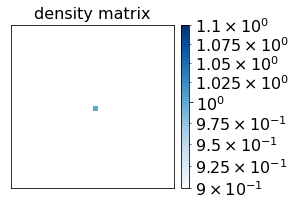

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
time: 963 ms


In [10]:
N1 = 3
N2 = 3
nphot= 2

initial_state_piqs_1 = piqs.ground(N1, 'dicke')
initial_state_piqs_2 = piqs.excited(N2, 'dicke')
plot_state(tensor(initial_state_piqs_1, initial_state_piqs_2))
print(np.real(tensor(initial_state_piqs_1, initial_state_piqs_2)))

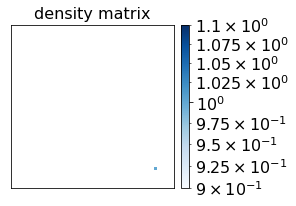

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
time: 826 ms


In [11]:
initial_state_qutip_1 = piqs.ground(N1, 'uncoupled')
initial_state_qutip_2 = piqs.excited(N2, 'uncoupled')
plot_state(tensor(initial_state_qutip_1, initial_state_qutip_2))
print(np.real(tensor(initial_state_qutip_1, initial_state_qutip_2)))

In [12]:
piqs_state = library.two_species_piqs_mesolve(N1,N2,initial_state_piqs_1,initial_state_piqs_2)[-1]
print(np.real(piqs_state))

[[ 1.56217285e-02  1.05387306e-06 -3.00529686e-10 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.05387306e-06  1.56276599e-02  1.24219636e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.00529686e-10  1.24219636e-06  1.56328349e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.12399616e-02
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   6.24806356e-02  2.38294604e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   2.38294604e-06  6.24664409e-02]]
time: 2.61 s


In [13]:
qutip_state = library.two_species_qutip_mesolve(N1,N2,initial_state_qutip_1,initial_state_qutip_2)[-1]
print(np.real(qutip_state))

[[1.56217288e-02 6.08452606e-07 6.08452606e-07 ... 1.25997134e-21
  1.25997748e-21 3.47883531e-25]
 [6.08452606e-07 1.56225407e-02 2.55985457e-06 ... 3.00365688e-17
  1.06009247e-20 1.25885676e-21]
 [6.08452606e-07 2.55985457e-06 1.56225407e-02 ... 1.06009234e-20
  3.00365688e-17 1.25885087e-21]
 ...
 [1.25997222e-21 3.00365689e-17 1.06009145e-20 ... 1.56252779e-02
  2.55999721e-06 5.96000904e-07]
 [1.25997810e-21 1.06009148e-20 3.00365689e-17 ... 2.55999721e-06
  1.56252779e-02 5.96000904e-07]
 [3.47885303e-25 1.25885747e-21 1.25885175e-21 ... 5.96000904e-07
  5.96000904e-07 1.56217288e-02]]
time: 17.3 s


In [14]:
decimal_precision = 8
compare_eig(piqs_state, qutip_state, decimal_precision, fast=True, verbose=False)

1st matrix
SUM =  1.0
eigenvalues_1
 [0.01562051 0.01562059 0.01562075 0.01562103 0.01562104 0.01563431
 0.01563506 0.01563547 0.01563657 0.01563659 0.01564393 0.01564627
 0.01564753 0.01565408 0.03124303 0.06246227 0.06246561 0.06246644
 0.06247633 0.06247894 0.06248337 0.06248865 0.06248886 0.06249425
 0.06251294 0.06252631 0.06253913]
sum =  0.99999986

2nd matrix
SUM =  1.0000000000000004
eigenvalues_2
 [0.01562051 0.01562059 0.01562075 0.01562103 0.01562104 0.01563431
 0.01563506 0.01563547 0.01563657 0.01563659 0.01564393 0.01564627
 0.01564753 0.01565408 0.03124303 0.06246227 0.06246561 0.06246644
 0.06247633 0.06247894 0.06248337 0.06248865 0.06248886 0.06249425
 0.06251294 0.06252631 0.06253913]
sum =  0.99999986

common eigenvalues
 [0.01562051, 0.01562059, 0.01562075, 0.01562103, 0.01562104, 0.01563431, 0.01563506, 0.01563547, 0.01563657, 0.01563659, 0.01564393, 0.01564627, 0.01564753, 0.01565408, 0.03124303, 0.06246227, 0.06246561, 0.06246644, 0.06247633, 0.06247894, 0.0624